##### Imports library

In [6]:
!pip install seaborn matplotlib geopandas
import json
import typing
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

##### Read dataset

###### We need to study the number of stars of review and business to express customer satisfaction, so we only need business and review datasets

In [7]:
business=pd.read_json("/Users/tingyu/Desktop/DATA5100/yelp data/yelp_academic_dataset_business.json", lines=True)

In [8]:
review=pd.read_json("/Users/tingyu/Desktop/DATA5100/yelp data/yelp_academic_dataset_review.json", lines=True)

## Data understanding

In [9]:
business.shape

(150346, 14)

In [10]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [11]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [12]:
review.shape

(6990280, 9)

In [13]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [14]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


##### merage business and review datasets

In [15]:
df = pd.merge(review, business, on='business_id')
#df = review.merge(business, how='inner', on='business_id')

In [16]:
df.shape

(6990280, 22)

##### See which regions our data is sampled from

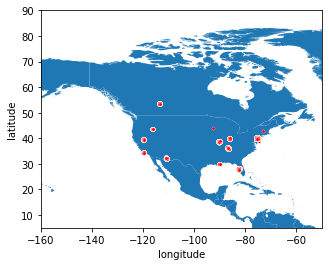

In [17]:
world = gpd.read_file('/Users/tingyu/Downloads/ne_10m_admin_0_countries_usa/ne_10m_admin_0_countries_usa.shp')

# Merge your data with the map
gdf = gpd.GeoDataFrame(business, geometry=gpd.points_from_xy(business.longitude, business.latitude))

%matplotlib inline

# Plot the map and data points
ax = world.plot()
sns.scatterplot(x='longitude', y='latitude', data=business, color='red', marker='o', s=10, ax=ax)
ax.set_xlim(-160, -50)
ax.set_ylim(5, 90)


plt.show()

##### Distribution of stars number

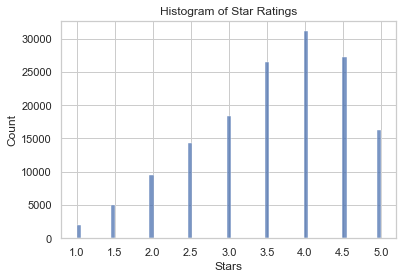

In [18]:
sns.set(style="whitegrid")

sns.histplot(data=business, x='stars')

plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Histogram of Star Ratings')
plt.show()

## Data preparation

In [19]:
import nltk
import re
import spacy
sp = spacy.load('en_core_web_sm')

#### As this dataset it's a **very heavy** one, let's use only the first 500000 rows and **reduce** the **memory usage** 

In [20]:
df = df.head(500000)
print(df.memory_usage(deep=True).sum())
print(df.shape)

1261357795
(500000, 22)


#### **Drop the columns** that we **won't be needing**

In [21]:
# cols_to_drop = ['review_id', 'user_id', 'useful', 'funny', 'cool', 'date', 'business_id'] 
# df.drop(cols_to_drop, inplace=True)
df = df[['stars_x', 'text', 'categories']]
df.head()

,stars_x,text,categories
0,3,"If you decide to eat here, just be aware it is...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,2,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,4,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,3,We came on a Saturday morning after waiting a ...,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,2,"Mediocre at best. The decor is very nice, and ...","Restaurants, Breakfast & Brunch, Food, Juice B..."


##### rename column

In [22]:
df.rename(columns={'text':'restaurant_reviews', 'stars_x':'stars'}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   stars               500000 non-null  int64 
 1   restaurant_reviews  500000 non-null  object
 2   categories          499992 non-null  object
dtypes: int64(1), object(2)
memory usage: 15.3+ MB


##### Drop Nan

In [24]:
df= df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499992 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   stars               499992 non-null  int64 
 1   restaurant_reviews  499992 non-null  object
 2   categories          499992 non-null  object
dtypes: int64(1), object(2)
memory usage: 15.3+ MB


##### We only want to analyze the restaurant category from the business dataset

In [26]:
df = df[df['categories'].str.contains('Restaurant')]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385649 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   stars               385649 non-null  int64 
 1   restaurant_reviews  385649 non-null  object
 2   categories          385649 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.8+ MB


In [28]:
# Check if there is NaN values
df.isnull().values.any()

False

In [29]:
df.shape

(385649, 3)

##### remove duplicate removed 

In [30]:
df_final = df.drop_duplicates(inplace=False)

In [31]:
df_final.shape

(384980, 3)

In [32]:
df_final = df_final[(df_final["stars"]!=3)]
df_final.head(20)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339606 entries, 1 to 499999
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   stars               339606 non-null  int64 
 1   restaurant_reviews  339606 non-null  object
 2   categories          339606 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.4+ MB


In [33]:
df_final.loc[df_final['stars'] < 3, 'sentiment'] = 0 
df_final.loc[df_final['stars'] > 3, 'sentiment'] = 1
df_final.drop('stars', axis=1, inplace=True)
df_final.head(20)

,restaurant_reviews,categories,sentiment
1,This is the second time we tried turning point...,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
2,The place is cute and the staff was very frien...,"Restaurants, Breakfast & Brunch, Food, Juice B...",1.0
4,"Mediocre at best. The decor is very nice, and ...","Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
5,When I was shown to my seat of was still wet s...,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
7,I went on a Thursday morning for breakfast. St...,"Restaurants, Breakfast & Brunch, Food, Juice B...",1.0
9,The food better be good because the iced coffe...,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
10,This place is conveniently located at English ...,"Restaurants, Breakfast & Brunch, Food, Juice B...",1.0
11,"""Who's in the kitchen and why can't they do th...","Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
12,Hopefully they will find their way but this pr...,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.0
13,Not Impressed at all. Ordered a omelette and b...,"Restaurants, Breakfast & Brunch, Food, Juice B...",0.0


In [34]:
df_final.sentiment.value_counts()

1.0    265180
0.0     74426
Name: sentiment, dtype: int64

In [35]:
reviews = df_final.restaurant_reviews
labels = df_final.sentiment
reviews[1]

'This is the second time we tried turning point at this location. The first time we had a long wait for food after ordering, this time we had an even longer wait of over 40 minutes. I had the omelette skillet and there was hardly any egg in it, I felt like I was eating chopped onions and chopped tomatoes. My wife had a BLT and had a hard time finding the tomato and the avocado that was supposed be on it. Overall,The experience was stressful, mainly because of the long wait.'

In [36]:
labels.replace({1.0: int(1), 0.0: int(0)}, inplace=True)

In [37]:
labels

1         0.0
2         1.0
4         0.0
5         0.0
7         1.0
         ... 
499993    0.0
499995    1.0
499996    1.0
499997    1.0
499999    1.0
Name: sentiment, Length: 339606, dtype: float64

In [40]:
sp = spacy.load('en_core_web_sm')
stopwords = sp.Defaults.stop_words
exclude_stopwords = ['no','not']
for word in exclude_stopwords:
    stopwords.remove(word)

In [41]:
import re
def spacy_process(text):
    doc = sp(text)
    
    # Lemmatization with Spacy
    lemma_list = [token.lemma_ for token in doc]

    # Filter stopwords, remove non-letters, and convert to lowercase
    filtered_sentence = [re.sub("[^a-zA-Z]", "", word.lower()) for word in lemma_list if not sp.vocab[word].is_stop]
    text_final = " ".join(filtered_sentence)
    
    return  " ".join(text_final.split())

In [42]:
df_final['cleaned_reviews'] = df_final['restaurant_reviews'].apply(spacy_process)

In [43]:
df_final.isnull().values.any()

False

In [44]:
df_final = df_final[['cleaned_reviews','sentiment']]

### Modeling

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import pandas as pd

In [126]:
# Seed for same output
torch.manual_seed(42)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [127]:
# Get data & labels
reviews = df_final.cleaned_reviews
labels = df_final.sentiment

In [128]:
if not isinstance(reviews, pd.Series):
    reviews = pd.Series(reviews)

if not reviews.index.is_integer():
    reviews = reviews.reset_index(drop=True)
    
if 0 not in reviews.index:
    reviews = reviews.reset_index(drop=True)
    
reviews = reviews.reset_index(drop=True)

In [129]:
if not isinstance(labels, pd.Series):
    labels = pd.Series(reviews)

if not labels.index.is_integer():
    labels = labels.reset_index(drop=True)
    
if 0 not in labels.index:
    labels = labels.reset_index(drop=True)

In [130]:
labels.replace({'1': int(1), '0': int(0)}, inplace=True)

In [131]:
df_final.shape

(339606, 2)

In [132]:
num_train = 271685
num_val = 67921
longest_num_tokens = 200

In [133]:
def indexing_tokens():
  indices = {'<SOS>':0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}
  counter = 4
  for i in range(num_train):
    tokens = reviews[i].split()
    for token in tokens:
      if token not in indices:
        indices[token] = counter
        counter += 1
  return indices

In [134]:
def get_data(indices, longest_line_tokens, mode='train'):
    data = []
    Y = []
    if mode == 'train':
      for i in range(num_train):
        one_train_data = []
        y, tokens = labels[i], reviews[i].split()
        for token in tokens:
          one_train_data.append(indices[token])
          if len(one_train_data) == longest_line_tokens:
            break
        while len(one_train_data) < longest_line_tokens:
          one_train_data.append(indices['<PAD>'])
        one_train_data.insert(indices['<SOS>'], 0)
        one_train_data.append(indices['<EOS>'])
        data.append(one_train_data)
        Y.append(y)
    else:
      for i in range(num_train, num_train+num_val):
        one_val_data = []
        y, tokens = labels[i], reviews[i].split()
        for token in tokens:
          if token not in indices:
            one_val_data.append(indices['<UNK>'])
          else:
            one_val_data.append(indices[token])
          if len(one_val_data) == longest_line_tokens:
            break
        while len(one_val_data) < longest_line_tokens:
          one_val_data.append(indices['<PAD>'])
        one_val_data.insert(indices['<SOS>'], 0)
        one_val_data.append(indices['<EOS>'])
        data.append(one_val_data)
        Y.append(y)
    return data, Y

In [135]:
# Loading Training Data & Val Data
indices = indexing_tokens()
training_data, training_labels = get_data(indices, longest_num_tokens)
val_data, val_labels = get_data(indices, longest_num_tokens, mode='val')

In [136]:
print('Number of training:', len(training_data))
print('Number of validation:', len(val_data))
print('Length of corpus:', len(indices))

Number of training: 271685
Number of validation: 67921
Length of corpus: 85965


In [137]:
print(type(training_labels[1]))

<class 'numpy.float64'>


In [138]:
# Create tensors of train & val
train_tensor = torch.tensor(training_data)
train_labels_tensor = torch.tensor(training_labels)
val_tensor = torch.tensor(val_data)
val_labels_tensor = torch.tensor(training_labels)

In [139]:
print('Train Tensor:', train_tensor.shape)
print('Val Tensor:', val_tensor.shape)

Train Tensor: torch.Size([271685, 202])
Val Tensor: torch.Size([67921, 202])


In [140]:
vocab_size = 85965
embedding_dim = 300
hidden_dim = 256
sequence_len = longest_num_tokens + 2
output_dim = 2
print_every = 400
batch_size = 32
qkv_dim = 200
heads = 10

In [97]:
mini_trains = DataLoader(train_tensor, batch_size=batch_size)
mini_train_labels = DataLoader(training_labels, batch_size=batch_size)

mini_vals = DataLoader(val_tensor, batch_size=batch_size)
mini_val_labels = DataLoader(val_labels, batch_size=batch_size)

In [98]:
iterator = iter(mini_trains)
print(next(iterator).shape)

iterator = iter(mini_train_labels)
print(next(iterator).shape)

torch.Size([32, 202])
torch.Size([32])


In [141]:
class MyModel(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
    super().__init__()
    self.embedding_layer = nn.Embedding(vocab_size, embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)
  def forward(self, x):
    # N x 252
    embedded_data = self.embedding_layer(x) # x = [1, 122344, 1234, 11000, 78,.....0]
    # N x 300 x 252
    output, (h_n, c_n) = self.lstm(embedded_data)
    out = output[:, -1, :] # h_n.squeeze()
    out = nn.functional.dropout(out)
    out = self.fc(out)
    return out

In [142]:
model = MyModel(85965, 300, 256, 2)

In [143]:
mini_trains = DataLoader(train_tensor, batch_size=batch_size)
mini_train_labels = DataLoader(training_labels, batch_size=batch_size)

mini_vals = DataLoader(val_tensor, batch_size=batch_size)
mini_val_labels = DataLoader(val_labels, batch_size=batch_size)

In [144]:
iterator = iter(mini_trains)
print(next(iterator).shape)

iterator = iter(mini_train_labels)
print(next(iterator).shape)

torch.Size([32, 202])
torch.Size([32])


In [77]:
# Training Procedure
def train(num_epoch, model, mini_trains, mini_train_labels, mini_vals, mini_val_labels, loss_function, optimizer):
  for epoch in range(num_epoch):
    num_iters = 0
    for x, y in zip(mini_trains, mini_train_labels):
      model.train()
      scores = model(x)
      loss = loss_function(scores, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
    
      if num_iters % print_every == 0:
        evaluate_predictor(model, epoch, mini_vals, mini_val_labels)
      num_iters += 1

In [78]:
# Evaluate Procedure
def evaluate_predictor(model, epoch, mini_vals, mini_val_labels):
  model.eval()
  with torch.no_grad():
    acc_count = 0
    for x, y in zip(mini_vals, mini_val_labels):
      scores=model(x)
      predictions=scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      acc_count += acc
    print(f'Epoch[{epoch+1}] Acc: {acc_count/len(val_data)}')

In [79]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Start training
train(5, model, mini_trains, mini_train_labels, mini_vals, mini_val_labels, loss_function, optimizer)

Epoch[1] Acc: 0.2902047967491645
Epoch[1] Acc: 0.7156549520766773
Epoch[1] Acc: 0.7156549520766773
Epoch[1] Acc: 0.7156843980506765
Epoch[1] Acc: 0.7156991210376761
Epoch[1] Acc: 0.7156549520766773
Epoch[1] Acc: 0.7156843980506765
Epoch[1] Acc: 0.7155077222066812
Epoch[1] Acc: 0.7157285670116753


In [146]:
def train(num_epoch, model, mini_trains, mini_train_labels, mini_vals, mini_val_labels, loss_function, optimizer):
    for epoch in range(num_epoch):
        num_iters = 0
        for x, y in zip(mini_trains, mini_train_labels):
            model.train()
            scores = model(x)
            # Convert y to Long type
            y = y.long()
            loss = loss_function(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            num_iters += 1

        # Evaluate at the end of each epoch
        if epoch % print_every == 0:
            evaluate_predictor(model, epoch, mini_vals, mini_val_labels)



def evaluate_predictor(model, epoch, mini_vals, mini_val_labels):
    model.eval()
    with torch.no_grad():
        acc_count = 0
        total_samples = 0
        for x, y in zip(mini_vals, mini_val_labels):
            scores = model(x)
            predictions = scores.max(1)[1]
            acc = predictions.eq(y).sum().item()
            acc_count += acc
            total_samples += len(y)

        accuracy = acc_count / total_samples
        print(f'Epoch[{epoch+1}] Acc: {accuracy}')


train(5, model, mini_trains, mini_train_labels, mini_vals, mini_val_labels, loss_function, optimizer)


Epoch[1] Acc: 0.6972070493661754
